# Study MESA models of zeta Ophiuchi

author: Mathieu Renzo, mrenzo@flatironinstitute.org

In [1]:
import sys
# the line below import stuff from git@github.com:mathren90/plotFunc.git
sys.path.append('/mnt/home/mrenzo/codes/python_stuff/plotFunc/')
from MESAreader import *
import matplotlib.pyplot as plt
from plotDefaults import *


In [2]:
set_plotDefaults()

done in plotDefaults.py


# zeta Ophiuchi's

https://ui.adsabs.harvard.edu/abs/2014ApJS..211...10S/abstract

In [ ]:
# from https://ui.adsabs.harvard.edu/abs/2001MNRAS.327..353H/abstract
# Spectral type: O9.5V

omega_div_omega_crit_obs = 0.9
err_omega_div_omega_crit_obs = 0.03

log_g_pole = 3.99
err_log_g_pole = 0.05

y = 0.2
err_y = 0.03

Tp = 39000 # kelvin
err_Tp = 1000

Teff = 34300 # kelvin

log_L = 4.96 

vsini = 400 #km/s
err_vsini = 50 # estimated from spread in the literature


i = 70 # degrees
err_i = 10

v_eq = 425 #km/s

In [54]:
root = "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/fiducial/"
binary = root+"/binary_to_donor_TAMS/LOGS2/"
accretor_to_TAMS_from_model = root+"/accretor_to_TAMS/from_model/LOGS/"
# accretor_to_TAMS_from_photo = root+"/accretor_to_TAMS/from_photo/LOGS/"
accretor_from_TAMS_to_Cdepl = root+"/accretor_TAMS_to_C_depl/LOGS/"
single_star_root = root+"/single_star_comparison/"

... Binary file does not yet exist
... let me scrub this for you


Data in /mnt/home/mrenzo/RUNS/zeta_ophiuchi/fiducial//accretor_TAMS_to_C_depl/LOGS//history.data has been scrubbed.
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/fiducial//accretor_TAMS_to_C_depl/LOGS//history.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


Text(0, 0.5, '$\\log_{10}(L/L_\\odot)$')

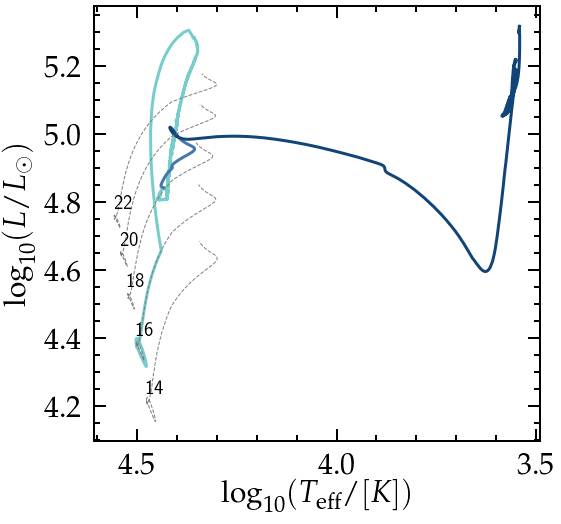

In [60]:
# HRD
def getlogLlogTeff(hfile):
    src, col = getSrcCol(hfile)
    log_Teff = src[:, col.index("log_Teff")]
    logL = src[:, col.index("log_L")]
    return logL, log_Teff


fig = plt.figure()
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:,:])

hfile1 = binary+'/history.data'
logL, logTeff = getlogLlogTeff(hfile1)
ax.plot(logTeff, logL, c='#77CCCC')

hfile2 = accretor_to_TAMS_from_model+'/history.data'
logL, logTeff = getlogLlogTeff(hfile2)
ax.plot(logTeff, logL, c='#4477AA')

# the HRD tracks are the same starting from model or photo
# hfile2 = accretor_to_TAMS_from_photo+'/history.data'
# logL, logTeff = getlogLlogTeff(hfile2)
# ax.plot(logTeff, logL, c='r', ls='--')

hfile3 = accretor_from_TAMS_to_Cdepl+'/history.data'
logL, logTeff = getlogLlogTeff(hfile3)
ax.plot(logTeff, logL, c='#114477')


for single_star in glob.glob(single_star_root+'/*/'):
    hsingle = single_star+'/LOGS/history.data'
    logL, logTeff = getlogLlogTeff(hsingle)
    ax.plot(logTeff, logL, c='#808080',lw=1, ls='--')
    mass = single_star.split('/')[-2]
    ax.text(logTeff[0]+0.001, logL[0]+0.02, mass, fontsize=20)

    
ax.invert_xaxis()
ax.set_xlabel(r"$\log_{10}(T_\mathrm{eff}/ [K])$")
ax.set_ylabel(r"$\log_{10}(L/L_\odot)$")




... Binary file does not yet exist
... let me scrub this for you


Data in /mnt/home/mrenzo/RUNS/zeta_ophiuchi/fiducial//single_star_comparison/14//LOGS/history.data has been scrubbed.
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/fiducial//single_star_comparison/14//LOGS/history.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


Text(0, 0.5, '$\\log_{10}(g/\\mathrm{cm\\ s^{-2}})$')

/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  func(*args, **kwargs)


/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.canvas.print_figure(bytes_io, **kw)


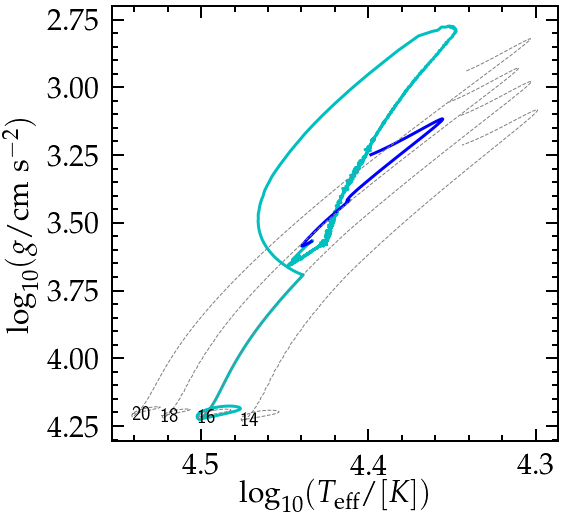

In [36]:
# spectroscopic HRD
def getlogglogTeff(hfile):
    src, col = getSrcCol(hfile)
    log_Teff = src[:, col.index("log_Teff")]
    log_g = src[:, col.index("log_g")]
    return log_g, log_Teff

fig = plt.figure()
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:,:])

hfile1 = binary+'/history.data'
logg, logTeff = getlogglogTeff(hfile1)
ax.plot(logTeff, logg, c='c')

hfile2 = accretor_to_TAMS_from_model+'/history.data'
logg, logTeff = getlogglogTeff(hfile2)
ax.plot(logTeff, logg, c='b')

# the HRD tracks are the same starting from model or photo
# hfile2 = accretor_to_TAMS_from_photo+'/history.data'
# logg, logTeff = getlogglogTeff(hfile2)
# ax.plot(logTeff, logg, c='r', ls='--')

for single_star in glob.glob(single_star_root+'/*/'):
    hsingle = single_star+'/LOGS/history.data'
    logg, logTeff = getlogglogTeff(hsingle)
    ax.plot(logTeff, logg, c='#808080',lw=1, ls='--')
    mass = single_star.split('/')[-2]
    ax.text(logTeff[0], logg[0]+0.02, mass, fontsize=20)

    
ax.invert_xaxis()
ax.invert_yaxis()    
ax.set_xlabel(r"$\log_{10}(T_\mathrm{eff}/ [K])$")
ax.set_ylabel(r"$\log_{10}(g/\mathrm{cm\ s^{-2}})$")

/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/mesaPlot-0.0-py3.7.egg/mesaPlot/plot.py:981: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  func(*args, **kwargs)


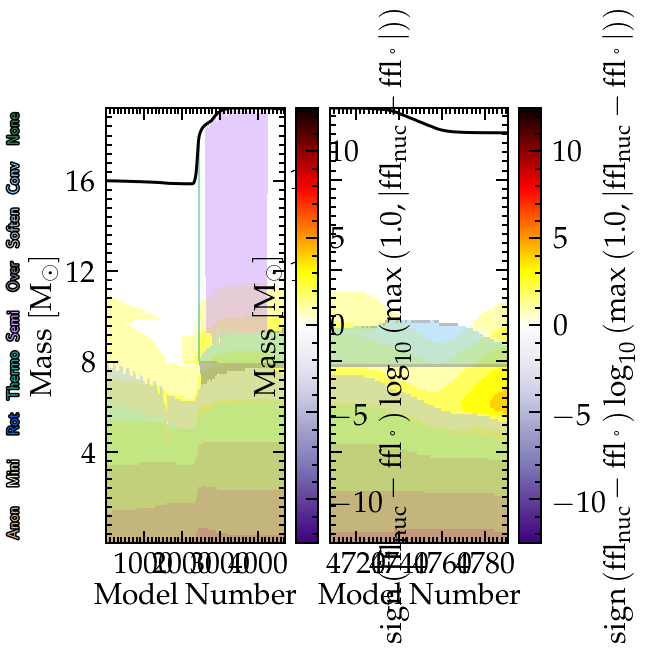

In [35]:
# Kippenhahn diagram
def Kippenhahn_combined(binary, accretor_to_TAMS, figname=""):
    fig = plt.figure()
    gs = gridspec.GridSpec(100, 100)
    ax = fig.add_subplot(gs[:,:50])
    bx = fig.add_subplot(gs[:,50:])

    x = 'model_number' # 'star_age'
    y = 'mass'

    mmm.loadHistory(f=binary)
    ppp.plotKip3(mmm, fig=fig, ax=ax,
                 xaxis=x,
                 # yaxis="radius",
                 reloadHistory=False,
                 show_mass_loc=False,
                 show_mix_labels=True,
                 show=False,
                 mix_alpha=0.5,# mix_hatch='//', hatch_color='#98ef56', 
                 age_lookback=True,
                 age_log=True,
                 zone_frac = 10, #0.2,
                 cmin=-12.45, cmax=12.5)

    mmm.loadHistory(f=accretor_to_TAMS)
    ppp.plotKip3(mmm, fig=fig, ax=bx,
                 xaxis=x,
                 # yaxis="radius",
                 reloadHistory=False,
                 show_mass_loc=False,
                 show_mix_labels=True,
                 show=False,
                 mix_alpha=0.5,# mix_hatch='//', hatch_color='#98ef56', 
                 age_lookback=True,
                 age_log=True,
                 zone_frac = 10, #0.2,
                 cmin=-12.45, cmax=12.5)


Kippenhahn_combined(binary, accretor_to_TAMS_from_model)
    

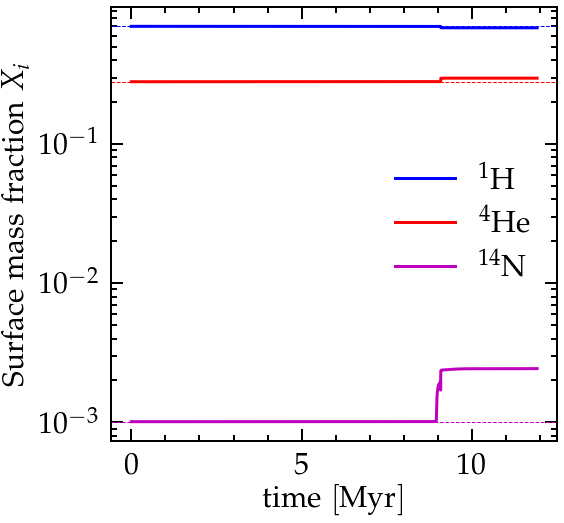

In [46]:
# surface composition
# He surface abundance vs. time
def plot_surface_abundances(binary, accretor_to_TAMS):
    src, col = getSrcCol(binary+'/history.data')
    src2, col2 = getSrcCol(accretor_to_TAMS+'/history.data')
    
    he4_1 = src[:, col.index("surface_he4")]
    h1_1  = src[:, col.index("surface_h1")]
    n14_1 = src[:, col.index("surface_n14")]
    c12_1 = src[:, col.index("surface_c12")]
    t_1   = src[:, col.index("star_age")]*1e-6
    
    he4_2 = src2[:, col2.index("surface_he4")]
    h1_2  = src2[:, col2.index("surface_h1")]
    n14_2 = src2[:, col2.index("surface_n14")]
    c12_2 = src2[:, col2.index("surface_c12")]
    t_2   = src2[:, col2.index("star_age")]*1e-6

    he4 = np.concatenate((he4_1, he4_2))
    h1  = np.concatenate((h1_1, h1_2 ))
    n14 = np.concatenate((n14_1, n14_2))
    c12 = np.concatenate((c12_1, c12_2))
    t   = np.concatenate((t_1, t_2))
     
    fig = plt.figure()
    gs = gridspec.GridSpec(100, 100)
    ax = fig.add_subplot(gs[:,:])

    ax.plot(t, h1,  c='b', label=r"$^1\mathrm{H}$")
    ax.plot(t, he4, c='r', label=r"$^4\mathrm{He}$")    
    ax.plot(t, n14, c='m', label=r"$^{14}\mathrm{N}$")

    ax.axhline(h1[0],0,1, c='b',ls='--', lw=1)
    ax.axhline(he4[0],0,1,c='r',ls='--', lw=1 )
    ax.axhline(n14[0],0,1,c='m',ls='--', lw=1 )

    
    ax.set_xlabel(r"$\mathrm{time \ [Myr]}$")
    ax.set_ylabel(r"$\mathrm{Surface\ mass\ fraction}\ X_i$")
    # ax.set_xlim(xmin=8.5, xmax=10)
    ax.set_yscale('log')
    ax.legend()
    
#test
plot_surface_abundances(binary, accretor_to_TAMS_from_model)    



In [ ]:
# surface rotation rate
def plot_omega_div_omega_crit(hfile):
    # TODO: finish
    print(colored(hfile, "blue"))
    src, col = getSrcCol(hfile)
    omega_div_omega_crit = src[:, col.index("surf_avg_omega_div_omega_crit")]
    t = src[:, col.index("star_age")]*1e-6
    
    fig = plt.figure()
    gs = gridspec.GridSpec(100, 100)
    ax = fig.add_subplot(gs[:,:])

    ax.plot(t, omega_div_omega_crit)
    ax.set_xlabel(r"$\mathrm{time \ [Myr]}$")
    ax.set_ylabel(r"$\omega/\omega_\mathrm{crit}$")
    ax.set_xlim(xmin=9, xmax=10)

#test
plot_omega_div_omega_crit((binary, accretor_to_TAMS)

